<a href="https://colab.research.google.com/github/KharismaPutriFadila/NLP_UAS/blob/main/A11_2022_14029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Load dataset
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']
df = df[['Sentiment', 'Tweet']]

In [ ]:
#Preprocessing Teks
manual_stopwords = set([
    'the','and','is','in','to','of','a','that','it','for','on','with','as','this',
    'was','but','are','they','be','at','have','you','not','or','an','from','by'
])

# Fungsi preprocessing
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|@\w+|#\w+", "", text) # hapus url, mention, hashtag
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # hapus tanda baca
    text = re.sub(r"\d+", "", text) # hapus angka
    tokens = text.split()
    tokens = [w for w in tokens if w not in manual_stopwords]
    return " ".join(tokens)

# Terapkan fungsi ke kolom tweet
df['Tweet'] = df['Tweet'].astype(str).fillna('')

# Lihat hasil
df['clean_tweet'] = df['Tweet'].apply(clean_text)

In [ ]:
# Ekstrasi fitur TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Ubah label sentimen ke angka
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['Sentiment'])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_tweet']).toarray()
y = df['label']

# Cek bentuk matriks fitur
X.shape


(74682, 3000)

In [ ]:
# Split data untuk training dan testing
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Model Naive bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Prediksi
nb_pred = nb.predict(X_test)


In [ ]:
# Model Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Prediksi
lr_pred = lr.predict(X_test)

In [ ]:
# Evaluasi model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fungsi evaluasi
def evaluate(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(
        y_true, y_pred, target_names=le.classes_))

# Evaluasi Naive Bayes
evaluate("Naive Bayes", y_test, nb_pred)

# Evaluasi Logistic Regression
evaluate("Logistic Regression", y_test, lr_pred)



=== Naive Bayes ===
Accuracy : 0.60413737698333
Confusion Matrix:
 [[ 758  789  382  663]
 [  97 3546  423  453]
 [ 165  916 1741  774]
 [ 117  692  442 2979]]
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.67      0.29      0.41      2592
    Negative       0.60      0.78      0.68      4519
     Neutral       0.58      0.48      0.53      3596
    Positive       0.61      0.70      0.65      4230

    accuracy                           0.60     14937
   macro avg       0.61      0.57      0.57     14937
weighted avg       0.61      0.60      0.59     14937


=== Logistic Regression ===
Accuracy : 0.643034076454442
Confusion Matrix:
 [[1203  449  446  494]
 [ 218 3346  567  388]
 [ 295  587 2147  567]
 [ 272  431  618 2909]]
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.61      0.46      0.53      2592
    Negative       0.70      0.74      0.72      4519
     Neutral       0.57


Tabel Akurasi Model:
                 Model  Accuracy
0          Naive Bayes  0.604137
1  Logistic Regression  0.643034


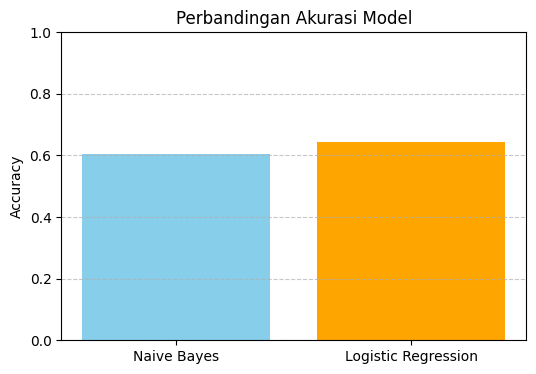

In [ ]:
import matplotlib.pyplot as plt

# Hitung akurasi
nb_accuracy = accuracy_score(y_test, nb_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Buat tabel akurasi
import pandas as pd

akurasi_data = {
    "Model": ["Naive Bayes", "Logistic Regression"],
    "Accuracy": [nb_accuracy, lr_accuracy]
}

df_akurasi = pd.DataFrame(akurasi_data)

# Tampilkan tabel akurasi
print("\nTabel Akurasi Model:")
print(df_akurasi)

# Buat grafik batang
plt.figure(figsize=(6, 4))
plt.bar(df_akurasi["Model"], df_akurasi["Accuracy"], color=["skyblue", "orange"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


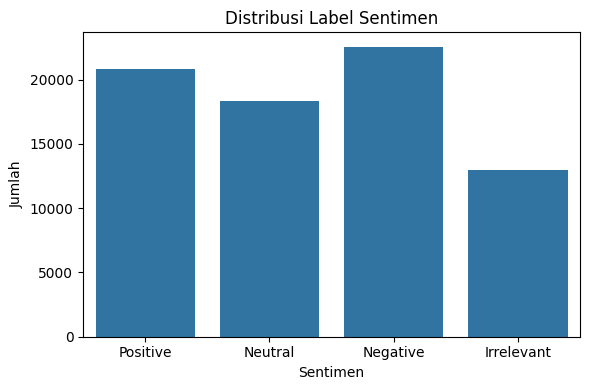

In [ ]:
#Distribusi data sentimen (untuk melihat distribusi jumlah data per kategori sentiment)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df)
plt.title("Distribusi Label Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

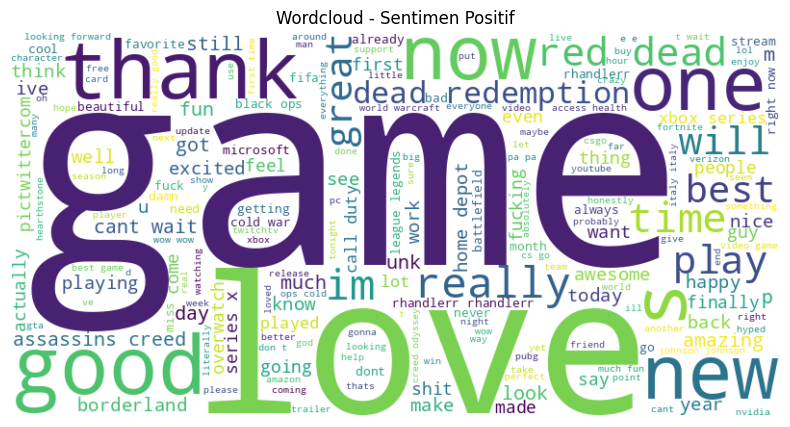

In [ ]:
#untuk menampilkan kata kata yg sering muncul di label
from wordcloud import WordCloud

# Contoh: Wordcloud untuk sentimen positif
positive_tweets = df[df['Sentiment'] == 'Positive']['clean_tweet'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud - Sentimen Positif")
plt.show()
